# PyCHO Geopandas Workshop

In [1]:
import pandas as pd
import geopandas as gpd
import descartes
import contextily
import matplotlib.pyplot as plt
import folium

# Open Police Data

[OpenPoliceData](https://github.com/openpolicedata/openpolicedata) is a Python package that provides easy access to 282 (and growing) incident-level open datasets from police departments around the United States. Datasets include traffic stops, use of force, officer-involved shootings, complaints, and other types of police interactions.

Users request data by department name and type of data. The data is returned as a pandas DataFrame. There is no need to manually find the data online or make API calls. 

In [2]:
import openpolicedata as opd

In [3]:
data = opd.Source(source_name="Virginia")

In [4]:
data.datasets

State SourceName    Agency AgencyFull TableType coverage_start  \
853  Virginia   Virginia  MULTIPLE        NaN     STOPS     2020-07-01   

    coverage_end last_coverage_check  \
853   2023-03-31          05/15/2023   

                                           Description  \
853  A data collection consisting of all traffic an...   

                                            source_url readme  \
853  https://data.virginia.gov/Public-Safety/Commun...   <NA>   

                   URL      Year DataType     date_field dataset_id  \
853  data.virginia.gov  MULTIPLE  Socrata  incident_date  2c96-texw   

    agency_field min_version  
853  agency_name        <NA>

In [5]:
agencies_richmond = data.get_agencies(partial_name="Richmond")
agencies_charlottesville = data.get_agencies(partial_name="Charlottesville")
agencies_virginia_beach = data.get_agencies(partial_name="Virginia Beach")
agencies_alexandria = data.get_agencies(partial_name="Alexandria")
agencies_arlington = data.get_agencies(partial_name="Arlington")
agencies_norfolk = data.get_agencies(partial_name="Norfolk")
agencies_newport_news = data.get_agencies(partial_name="Newport News")
agencies_chesapeake = data.get_agencies(partial_name="Chesapeake")
agencies_roanoke = data.get_agencies(partial_name="Roanoke")
agencies_lynchburg = data.get_agencies(partial_name="Lynchburg")

print(agencies_richmond)
print()
print(agencies_charlottesville)
print()
print(agencies_virginia_beach)
print()
print(agencies_alexandria)
print()
print(agencies_arlington)
print()
print(agencies_norfolk)
print()
print(agencies_newport_news)
print()
print(agencies_chesapeake)
print()
print(agencies_roanoke)
print()
print(agencies_lynchburg)



["Richmond County Sheriff's Office", 'Richmond Police Department', 'University Of Richmond Police Department', 'Richmond International Airport Police']

['Charlottesville Albemarle Airport Police Department', 'Charlottesville Police Department']

["Virginia Beach City Sheriff's Office", 'Virginia Beach Police Department']

['Alexandria Police Department', "Alexandria City Sheriff's Office"]

["Arlington County Sheriff's Office", 'Arlington County Police Department']

['Norfolk State University Police Department', "Norfolk Sheriff's Office", 'Norfolk Southern Police Department', 'Norfolk Airport Authority Police Department', 'Norfolk Police Department']

["Newport News Sheriff's Office", 'Newport News/Williamsburg International Airport Police', 'Newport News Police Department']

['Chesapeake Bay Bridge-Tunnel Police Department', "Chesapeake City Sheriff's Office", 'Chesapeake Police Department']

['Roanoke City Police Department', 'Roanoke County Police Department', "Roanoke City Sherif

<b>Just to give you a preview, the table object for each agency's dataset looks like this.</b>

We are getting traffic stops from the dataset. This is the 'table_type='STOPS' part

In [6]:
agency = "Richmond Police Department"
table = data.load_from_url(year=2021, table_type='STOPS', agency=agency)
print(table)

print()

print(type(table))

state: Virginia,
source_name: Virginia,
agency: Richmond Police Department,
table_type: TableType.STOPS,
year: 2021,
description: A data collection consisting of all traffic and investigatory stops made in Virginia as aggregated by Virginia Department of State Police,
url: data.virginia.gov

<class 'openpolicedata.data.Table'>


In [7]:
police_data_tables = {}

agencies = ['Richmond Police Department', 'Charlottesville Police Department', 'Virginia Beach Police Department',  'Alexandria Police Department',
           'Norfolk Police Department', 'Newport News Police Department', 'Chesapeake Police Department', 'Roanoke City Police Department', 'Lynchburg Police Department']

for agency in agencies:
    # get police data for each city in the form of a table
    police_data = data.load_from_url(year=2021, table_type='STOPS', agency=agency)
    # add this as key/value pair to dictionary
    police_data_tables[agency] = police_data.table
    
# renaming 'Roanoke City Police Department' to just 'Roanoke Police Department' so that it matches all the others
police_data_tables['Roanoke Police Department'] = police_data_tables.pop('Roanoke City Police Department')
    

<b>To give another example of the table inside this table object, it is a pandas dataframe!</b>

In [8]:
richmond_df = table.table
print(type(richmond_df))


<class 'pandas.core.frame.DataFrame'>


In [9]:
richmond_df

incident_date                 agency_name   jurisdiction  \
0       2021-01-01  Richmond Police Department  RICHMOND CITY   
1       2021-01-01  Richmond Police Department  RICHMOND CITY   
2       2021-01-01  Richmond Police Department  RICHMOND CITY   
3       2021-01-01  Richmond Police Department  RICHMOND CITY   
4       2021-01-01  Richmond Police Department  RICHMOND CITY   
...            ...                         ...            ...   
5231    2021-12-31  Richmond Police Department  RICHMOND CITY   
5232    2021-12-31  Richmond Police Department  RICHMOND CITY   
5233    2021-12-31  Richmond Police Department  RICHMOND CITY   
5234    2021-12-31  Richmond Police Department  RICHMOND CITY   
5235    2021-12-31  Richmond Police Department  RICHMOND CITY   

          reason_for_stop                       race               ethnicity  \
0       TRAFFIC VIOLATION  BLACK OR AFRICAN AMERICAN                 UNKNOWN   
1       TRAFFIC VIOLATION  BLACK OR AFRICAN AMERICAN                 UNKNOWN   
2     EQUIPMENT VIOLATION  BLACK OR AFRICAN AMERICAN                 UNKNOWN   
3     EQUIPMENT VIOLATION  BLACK OR AFRICAN AMERICAN  NOT HISPANIC OR LATINO   
4       TRAFFIC VIOLATION  BLACK OR AFRICAN AMERICAN                 UNKNOWN   
...                   ...                        ...                     ...   
5231    TRAFFIC VIOLATION  BLACK OR AFRICAN AMERICAN  NOT HISPANIC OR LATINO   
5232    TRAFFIC VIOLATION                      WHITE      HISPANIC OR LATINO   
5233    TRAFFIC VIOLATION                      WHITE                 UNKNOWN   
5234    TRAFFIC VIOLATION  BLACK OR AFRICAN AMERICAN                 UNKNOWN   
5235    TRAFFIC VIOLATION                      WHITE                 UNKNOWN   

     age  gender      action_taken violation_type specific_violation  \
0     30  FEMALE    WARNING ISSUED   COMMONWEALTH            MISSING   
1     30  FEMALE    WARNING ISSUED   COMMONWEALTH            MISSING   
2     29    MALE    WARNING ISSUED   COMMONWEALTH          46.2-1003   
3     58    MALE    WARNING ISSUED          LOCAL          46.2-1030   
4      0  FEMALE    WARNING ISSUED   COMMONWEALTH           46.2-104   
...   ..     ...               ...            ...                ...   
5231  62  FEMALE  CITATION/SUMMONS            NaN           46.2-646   
5232  27    MALE  CITATION/SUMMONS            NaN           46.2-821   
5233  25    MALE    WARNING ISSUED            NaN           46.2-852   
5234  24    MALE    WARNING ISSUED            NaN           46.2-833   
5235  59    MALE    WARNING ISSUED            NaN           46.2-646   

     person_searched vehicle_searched additional_arrest person_type  \
0                 NO               NO                NO         NaN   
1                 NO               NO                NO         NaN   
2                 NO               NO                NO         NaN   
3                 NO               NO                NO         NaN   
4                 NO               NO                NO         NaN   
...              ...              ...               ...         ...   
5231              NO               NO               NaN      DRIVER   
5232              NO               NO               NaN      DRIVER   
5233              NO               NO               NaN      DRIVER   
5234              NO               NO               NaN      DRIVER   
5235              NO               NO               NaN      DRIVER   

     english_speaking physical_force_by_officer physical_force_by_subject  
0                 NaN                       NaN                       NaN  
1                 NaN                       NaN                       NaN  
2                 NaN                       NaN                       NaN  
3                 NaN                       NaN                       NaN  
4                 NaN                       NaN                       NaN  
...               ...                       ...                       ...  
5231         

In [10]:
richmond_df['reason_for_stop'].value_counts()

reason_for_stop
TRAFFIC VIOLATION                4612
EQUIPMENT VIOLATION               496
OTHER INVESTIGATIVE DETENTION      41
CHECK POINT                        39
TERRY STOP                         30
CALLS FOR SERVICE                  18
Name: count, dtype: int64

## City of Richmond GIS Data

[From Richmond GeoHub](https://richmond-geo-hub-cor.hub.arcgis.com/)

In [11]:
# this is the relative path to where the data is stored
my_path = './GIS_Data'  

<Axes: >

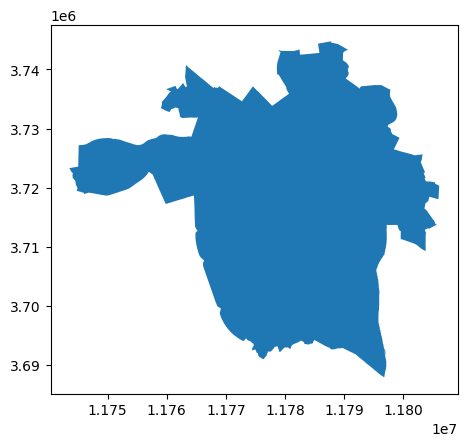

In [12]:
richmond_boundary = gpd.read_file(my_path + "/city_boundaries/Richmond_City_Boundary.shp")
richmond_boundary.plot()

### Add a basemap

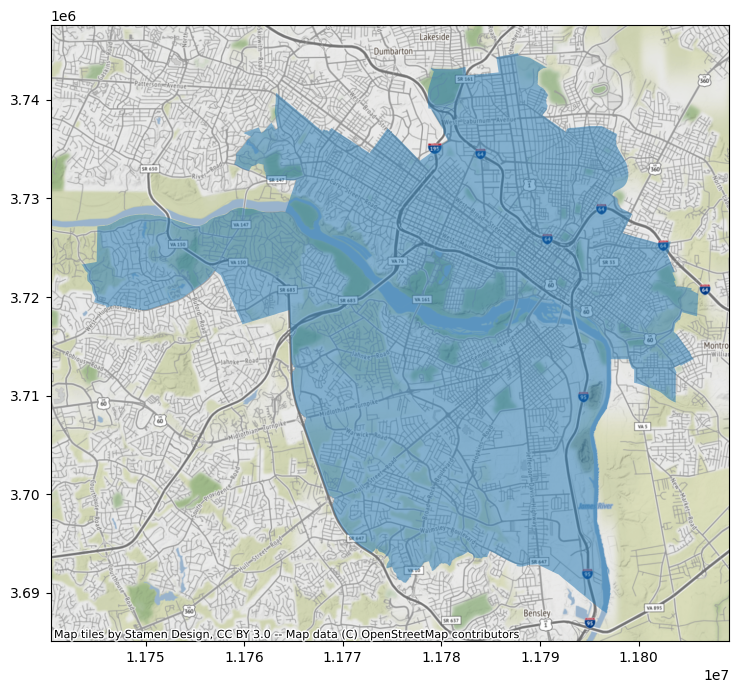

In [13]:
# find this code in geopanda docs: https://geopandas.org/en/stable/gallery/plotting_basemap_background.html?highlight=basemap

ax = richmond_boundary.plot(figsize=(10,8), alpha=0.5)
contextily.add_basemap(ax, crs=richmond_boundary.crs)

<Axes: >

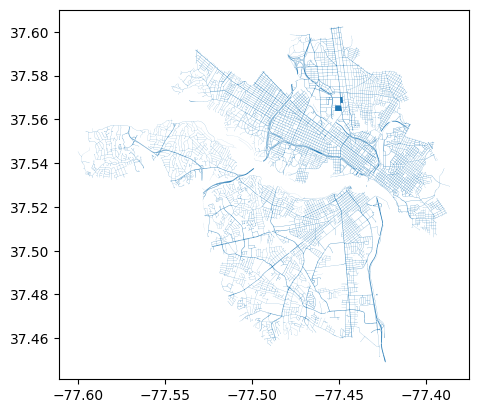

In [14]:
roads = gpd.read_file(my_path + '/Richmond_Roads.geojson')
roads.plot()

### Overlay Multiple Layers

You can put things on top of eachother just as you would in matplotlib

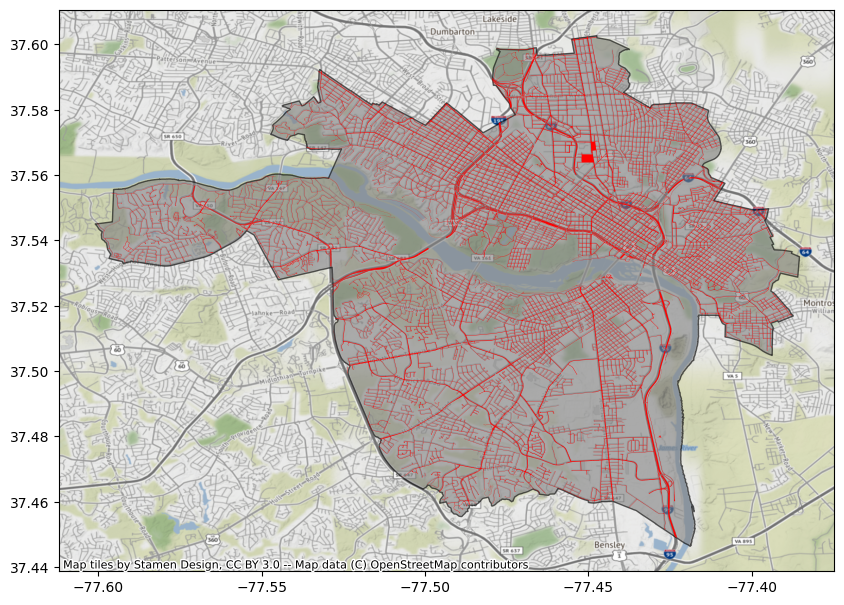

In [15]:
richmond_boundary = richmond_boundary.to_crs(epsg=4326)   # we will talk about this next

fig, ax = plt.subplots(figsize=(10, 8))
richmond_boundary.plot(ax=ax, color="gray", edgecolor='black', alpha=0.6)
roads.plot(ax=ax, color="red")
contextily.add_basemap(ax=ax, crs=richmond_boundary.crs)



# GeoPandas GeoDataFrames

A GeoPandas GeoDataFrame is an extension to the pandas dataframe object. A GeoDataFrame has a 'geometry' column that stores the spatial geometry of the object.

In [16]:
roads_clip = roads.iloc[:5]
roads_clip

OBJECTID Paved FIPS      CreatedBy                      CreatedDate  \
0     11446   Yes  760  richmondvagis 2023-01-10 19:59:51.875000+00:00   
1     11447   Yes  760  richmondvagis 2023-01-10 19:59:51.875000+00:00   
2     11448   Yes  760  richmondvagis 2023-01-10 19:59:51.875000+00:00   
3     11449   Yes  760  richmondvagis 2023-01-10 19:59:51.875000+00:00   
4     11450   Yes  760  richmondvagis 2023-01-10 19:59:51.875000+00:00   

          EditBy                         EditDate  \
0  richmondvagis 2023-01-10 19:59:51.875000+00:00   
1  richmondvagis 2023-01-10 19:59:51.875000+00:00   
2  richmondvagis 2023-01-10 19:59:51.875000+00:00   
3  richmondvagis 2023-01-10 19:59:51.875000+00:00   
4  richmondvagis 2023-01-10 19:59:51.875000+00:00   

                               GlobalID  Shape__Area  Shape__Length  \
0  5c9bc69f-5b75-4f27-8744-633a297076f7    16.011719      41.711297   
1  19fb3b53-e8f6-4148-aee0-e627fb4bd93d    14.808594      37.559407   
2  31067ae7-06ac-466b-abfc-1cd4509fc3c1    79.066406      89.260827   
3  83538cc8-5f3d-43f1-9c8b-2071ead04797    42.101562      56.511747   
4  74d2f6e6-ac6f-41b3-80c4-18f9e92f051d    44.718750      52.527808   

                                            geometry  
0  POLYGON ((-77.51269 37.52309, -77.51275 37.523...  
1  POLYGON ((-77.51240 37.52315, -77.51256 37.523...  
2  POLYGON ((-77.51226 37.52311, -77.51225 37.523...  
3  POLYGON ((-77.51211 37.52321, -77.51217 37.523...  
4  POLYGON ((-77.51165 37.52334, -77.51165 37.523...

# Coordinate Reference Systems

In [17]:
richmond_boundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

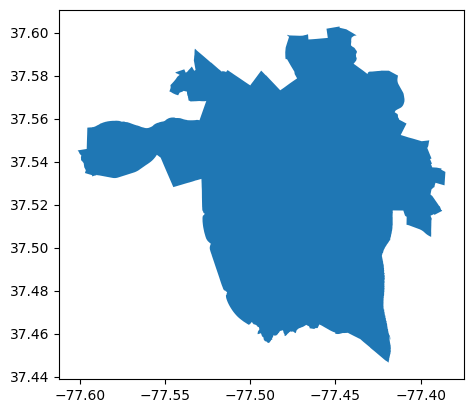

In [18]:
richmond_boundary = richmond_boundary.to_crs(epsg=4326)
richmond_boundary.plot()

In [19]:
schools = gpd.read_file(my_path + '/Richmond_Public_Schools.geojson')

schools['Type'].value_counts()

Type
Elementary    28
High           7
Middle         7
Specialty      2
Name: count, dtype: int64

### Add Legend

Matplotlib is smart enough to put a legend where there is space in the map. You can manually specify where it goes if you want.

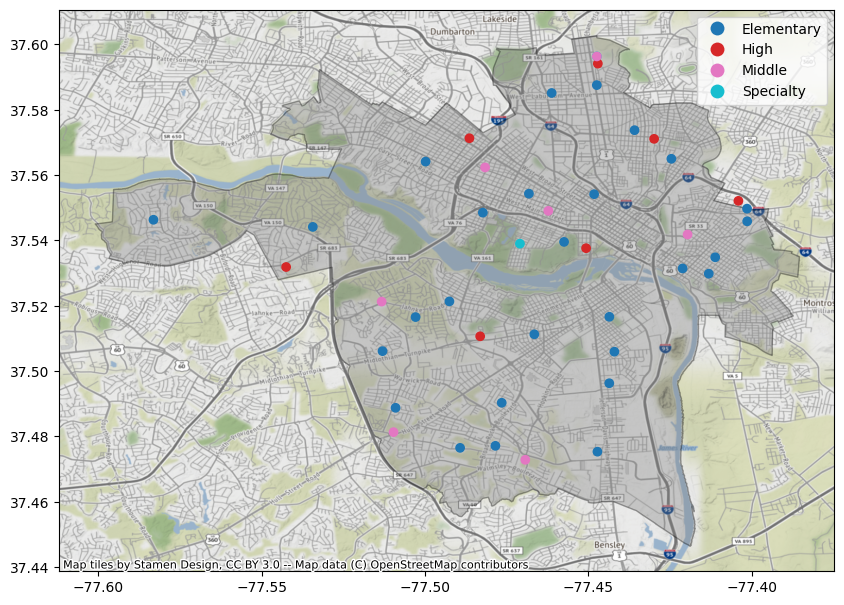

In [20]:

fig, ax = plt.subplots(figsize=(10, 8))
richmond_boundary.plot(ax=ax, color="gray", edgecolor='black', alpha=0.35)
schools.plot(ax=ax, column='Type', categorical=True, legend=True)           # notice the legend!
contextily.add_basemap(ax=ax, crs=schools.crs)

## Bring back the police data

In [21]:
Richmond = gpd.read_file(my_path + "/city_boundaries/Richmond_City_Boundary.shp")
Richmond = Richmond.to_crs(epsg=4326)

Charlottesville = gpd.read_file(my_path + "/city_boundaries/Charlottesville_City_Boundary.geojson")
Charlottesville = Charlottesville.to_crs(epsg=4326)

Alexandria = gpd.read_file(my_path + "/city_boundaries/Alexandria_City_Boundary.geojson")
Alexandria = Alexandria.to_crs(epsg=4326)

Virginia_Beach = gpd.read_file(my_path + "/city_boundaries/Virginia_Beach_City_Boundary.geojson")
Virginia_Beach = Virginia_Beach.to_crs(epsg=4326)

Norfolk = gpd.read_file(my_path + "/city_boundaries/Norfolk_City_Boundary.geojson")
Norfolk = Norfolk.to_crs(epsg=4326)

Newport_News = gpd.read_file(my_path + "/city_boundaries/Newport_News_City_Boundary.gpkg")
Newport_News = Newport_News.to_crs(epsg=4326)

Chesapeake = gpd.read_file(my_path + "/city_boundaries/Chesapeake_City_Boundary.geojson")
Chesapeake = Chesapeake.to_crs(epsg=4326)

Roanoke = gpd.read_file(my_path + "/city_boundaries/Roanoke_City_Boundary.gpkg")
Roanoke = Roanoke.to_crs(epsg=4326)

Lynchburg = gpd.read_file(my_path + "/city_boundaries/Lynchburg_City_Boundary.geojson")
Lynchburg = Lynchburg.to_crs(epsg=4326)


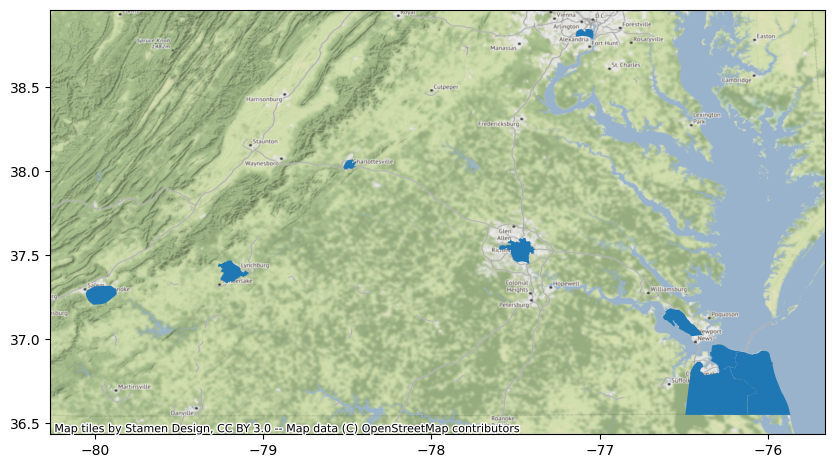

In [22]:
cities = [Richmond, Charlottesville, Alexandria, Virginia_Beach, Norfolk, Newport_News, Chesapeake, Roanoke, Lynchburg]

fig, ax = plt.subplots(figsize=(10, 8))
for i in cities:
    i.plot(ax=ax)
contextily.add_basemap(ax=ax, crs=Richmond.crs)

### Clean up police data

In [23]:
# I had never done this before! Access the global variables currently in memory using the vars() method
# I am doing this because I have a variable above in the 'cities' list with the same name as the police department
# rather than making various lists or dictionaries and then adding them to the GeoDataFrames, I can do it all in one loop!
myVars = vars()     #accesses global variables in memory

# use agency names from police_data_tables dictionary above
for city_pd in police_data_tables.keys():

    city_name = city_pd.removesuffix(' Police Department')  # cleaning this from end of string
    city_name = city_name.replace(' ', '_')                 # replace spaces with underscore
    
    # make some new data for the purposes of using in our GeoDataFrames
    total_traffic_stops = police_data_tables[city_pd].shape[0]    # get count of number of rows in dataframe (ie: number of incidents)
    stops_white = police_data_tables[city_pd].loc[police_data_tables[city_pd]['race'] == 'WHITE']
    stops_black = police_data_tables[city_pd].loc[police_data_tables[city_pd]['race'] == 'BLACK OR AFRICAN AMERICAN']
    
    # add police data to GeoDataFrame for each city
    myVars[city_name]['total traffic stops'] = total_traffic_stops
    myVars[city_name]['stops white'] = stops_white.shape[0]
    myVars[city_name]['stops black'] = stops_black.shape[0]
    myVars[city_name]['Pct White Stops'] = stops_white.shape[0] / total_traffic_stops
    myVars[city_name]['Pct Black Stops'] = stops_black.shape[0] / total_traffic_stops
    
    # all but Charlottesville tracks Terry Stops so I have to account for this with some error handling
    try:
        myVars[city_name]['Pct White Terry Stop'] = stops_white['reason_for_stop'].value_counts()['TERRY STOP'] / stops_white.shape[0]
        myVars[city_name]['Pct Black Terry Stop'] = stops_black['reason_for_stop'].value_counts()['TERRY STOP'] / stops_black.shape[0]
    except:
        myVars[city_name]['Pct White Terry Stop'] = 0.0
        myVars[city_name]['Pct Black Terry Stop'] = 0.0
        
    
print(Richmond['stops white'])
print(Richmond['Pct White Terry Stop'])



0    1770
Name: stops white, dtype: int64
0    0.00791
Name: Pct White Terry Stop, dtype: float64


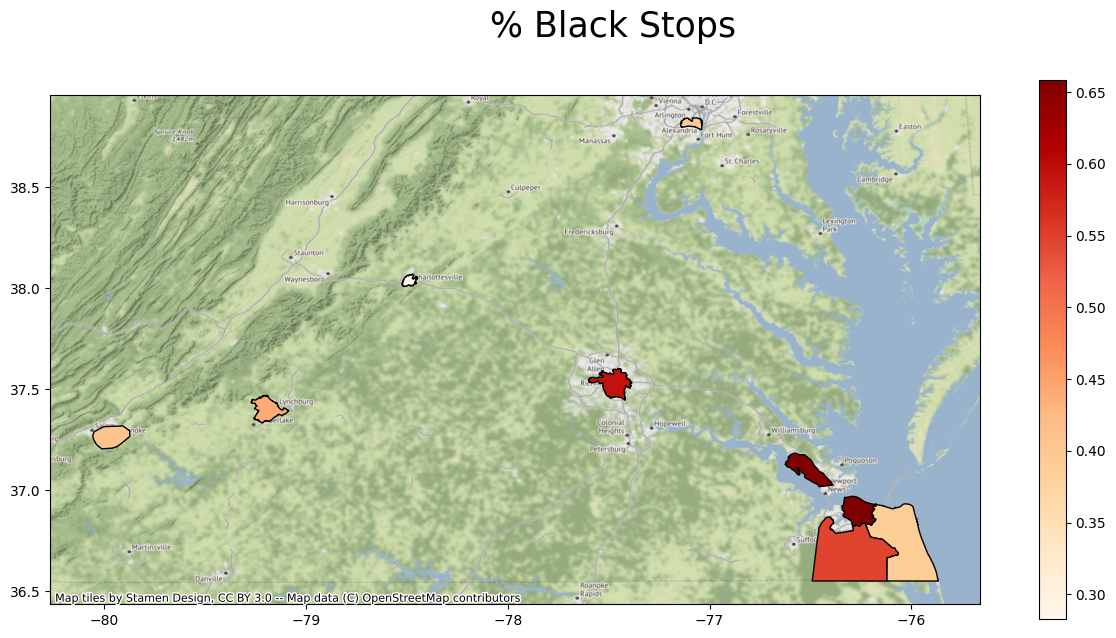

In [24]:
# concatenate all the dataframes into one dataframe called 'all_VA'data'. This is for the purpose of plotting it all together
all_VA_data = pd.concat(cities)

fig, ax = plt.subplots(figsize=(15, 7))
all_VA_data.plot(ax=ax, column='Pct Black Stops', edgecolor='black', legend=True, cmap='OrRd')
fig.suptitle('% Black Stops', fontsize=25)
contextily.add_basemap(ax=ax, crs=all_VA_data.crs)

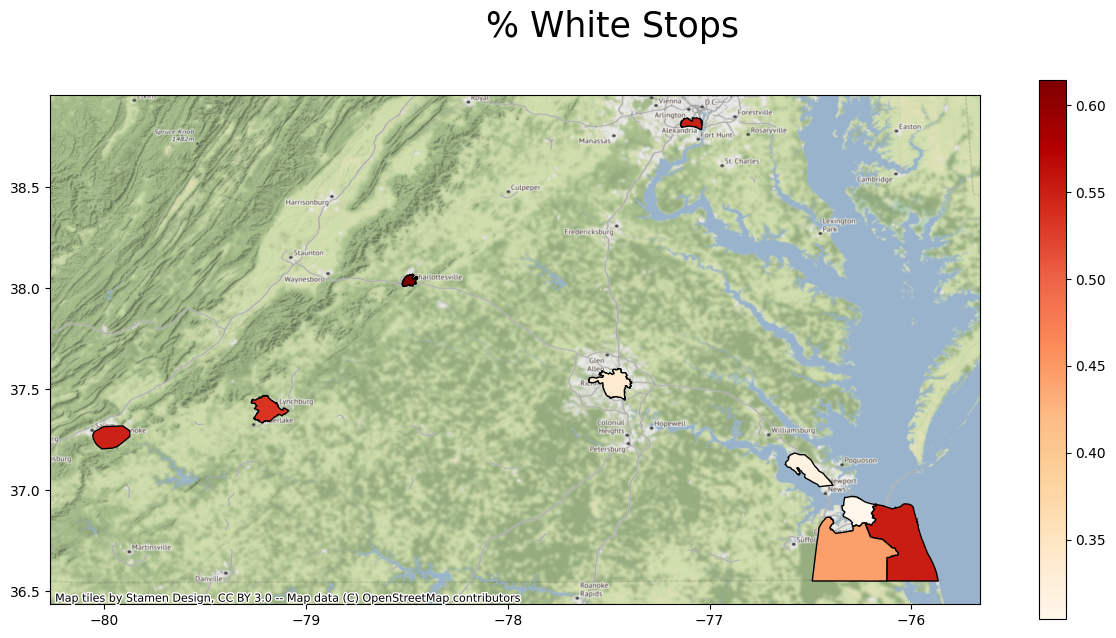

In [25]:
fig, ax = plt.subplots(figsize=(15, 7))
all_VA_data.plot(ax=ax, column='Pct White Stops', edgecolor='black', legend=True, cmap='OrRd')
fig.suptitle('% White Stops', fontsize=25)
contextily.add_basemap(ax=ax, crs=all_VA_data.crs)

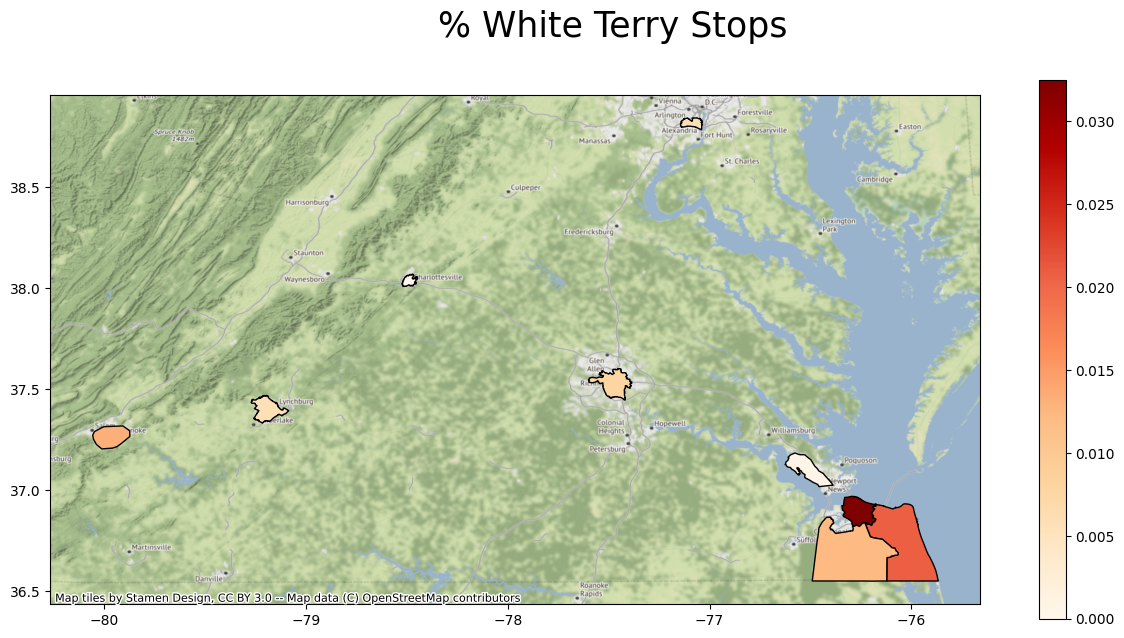

In [26]:

fig, ax = plt.subplots(figsize=(15, 7))
all_VA_data.plot(ax=ax, column='Pct White Terry Stop', edgecolor='black', legend=True, cmap='OrRd')
fig.suptitle('% White Terry Stops', fontsize=25)
contextily.add_basemap(ax=ax, crs=all_VA_data.crs)

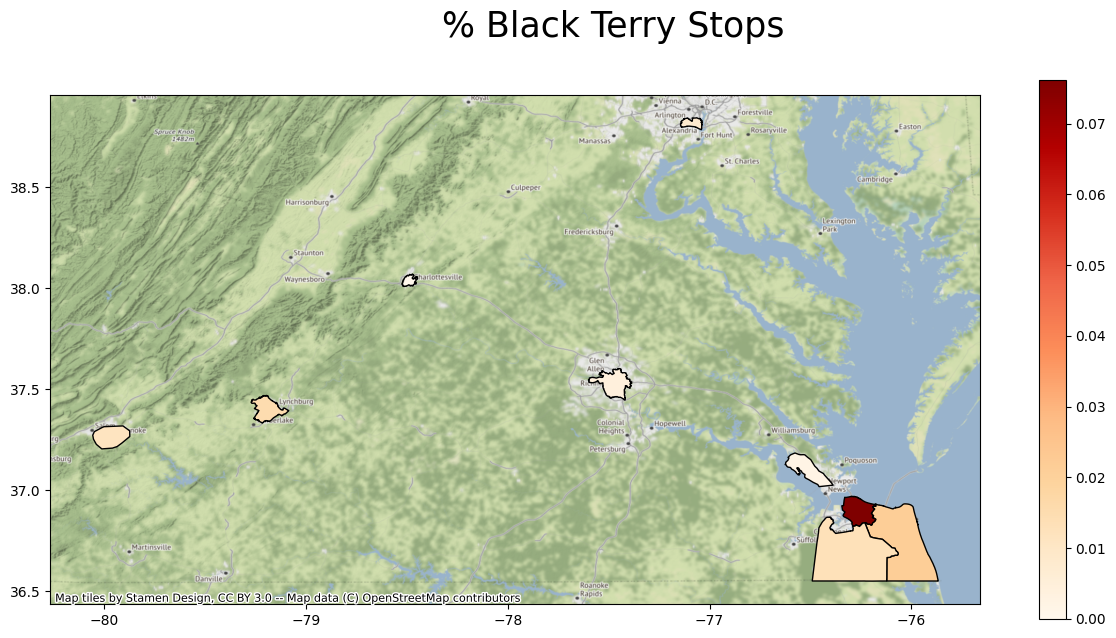

In [27]:
fig, ax = plt.subplots(figsize=(15, 7))
all_VA_data.plot(ax=ax, column='Pct Black Terry Stop', edgecolor='black', legend=True, cmap='OrRd')
fig.suptitle('% Black Terry Stops', fontsize=25)
contextily.add_basemap(ax=ax, crs=all_VA_data.crs)

# Folium - Leaflet.js for python!

If anyone here ever uses Javascript, you might be familiar with the mapping library, [Leaflet](https://leafletjs.com/).

[Folium](https://python-visualization.github.io/folium/) is another python mapping library built on top of Leaflet. Now, we can make really nice web maps with python instead of Javascript! The strength of folium is in its mapping capabilities. This is not a data manipulation library in the way that GeopPandas is.

In [28]:
m = folium.Map(location=[37.5407, -77.436], zoom_start=10)
m

### Add Data to the Map

We can add all the same kinds of data we previously used in GeoPandas

In [29]:
# notice that I am streaming this data from a URL provided by the city of Richmond's data portal: https://richmond-geo-hub-cor.hub.arcgis.com/datasets/cor::public-libraries/about
richmond_libraries = f"https://services1.arcgis.com/k3vhq11XkBNeeOfM/arcgis/rest/services/PublicLibrary/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"

m = folium.Map(
    location=[37.5407, -77.436],
    zoom_start=11,
)

folium.GeoJson(richmond_libraries, name="geojson").add_to(m)

m

### Choropleth maps

Folium has some really nice looking mapping capabilities. These go far beyond the plots of geopandas and matplotlib

In [30]:
# I got this example straight from the Folium documentation: https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

### Using GeoPandas with Folium

In [31]:
#geopandas docs about plotting with folium: https://geopandas.org/en/stable/gallery/plotting_with_folium.html

volcanoes = pd.read_csv(my_path + '/volcano_data_2010.csv')

# keep only relevant columns
volcanoes = volcanoes.loc[:, ("Year", "Name", "Country", "Latitude", "Longitude", "Type")]
volcanoes

FileNotFoundError: [Errno 2] No such file or directory: './GIS_Data/volcano_data_2010.csv'

In [ ]:
# create point geometries for the volcanoes
geometry = gpd.points_from_xy(volcanoes['Longitude'], volcanoes['Latitude'])    # this makes point objects in an array

volcanoes['geometry'] = geometry     # add points as new column to geodataframe
volcanoes

In [ ]:
#make map with OpenStreetMap basemap

# OpenStreetMap
mymap = folium.Map(location = [0, 0], tiles='OpenStreetMap' , zoom_start = 1)
mymap

### Make Markers for Each Volcano in Folium Map

This is tricky stuff but basically we are iterating over each point in the GeoDataFrame and creating a marker for it.

In [ ]:
# Create Markers for Volcanoes

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in volcanoes.geometry ]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    #assign a color marker for the type of volcano, Strato being the most common
    if volcanoes.Type[i] == "Stratovolcano":
        type_color = "green"
    elif volcanoes.Type[i] == "Complex volcano":
        type_color = "blue"
    elif volcanoes.Type[i] == "Shield volcano":
        type_color = "orange"
    elif volcanoes.Type[i] == "Lava dome":
        type_color = "pink"
    else:
        type_color = "purple"


    # Place the markers with the popup labels and data
    mymap.add_child(folium.Marker(location = coordinates,
                            popup =
                                "Year: " + str(volcanoes.Year[i]) + '<br>' + '<br>' +
                                "Name: " + str(volcanoes.Name[i]) + '<br>' + '<br>' +
                                "Country: " + str(volcanoes.Country[i]) + '<br>' '<br>' +
                                "Type: " + str(volcanoes.Type[i]) + '<br>' '<br>' +
                                "Coordinates: " + str(geo_df_list[i]),
                            icon = folium.Icon(color = "%s" % type_color)))
    i+=1
    
mymap